In [1]:
#import all necessary packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import lmplot
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE

In [2]:
#setting style for any visuals plotted later in notebook
plt.style.use('seaborn')
#loading in dataset
df = pd.read_csv('kc_house_data.csv')

Here we are displaying our data so that we may get an understanding of the dataset itself. I show the first 5 rows, the last five rows, a random sample of 30 rows in the dataset, a detailed description of the data usinf info and describe and the shape. From here, I notice a few things off the bat. There are null values in our data within some of the rows. Also, there are values in sqft_basement equal to a string '?'. Therefore, we have more missing data to address that isn't captured by NaN values. Some of our data is continuous (i.e. sqft_blank, price, lat, long) and some are categorical (i.e. bedrooms, floors, bathrooms, yr_built, etc.). I will address those issues later on in the notebook, but to start off I want to deal with our null values.

In [3]:
#first 5 rows using .head()
display(df.head())
#last five rows
display(df.tail())
#randomly selected 30 rows
display(df.sample(30))
#Print a concise summary of a DataFrame using .info()
display(df.info())
#Generates descriptive statistics using .describe()
display(np.round(df.describe()))
df.shape

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14379,9211510410,4/7/2015,270000.0,3,1.75,1610,6205,1.0,0.0,0.0,...,7,1210,400.0,1979,0.0,98023,47.3004,-122.383,1780,8056
11319,3438500677,6/13/2014,305000.0,3,1.50,1210,5240,1.0,0.0,0.0,...,7,610,?,1983,0.0,98106,47.5524,-122.356,1560,5240
14164,3031200230,2/26/2015,350000.0,3,1.00,2480,8906,1.0,0.0,0.0,...,7,1240,1240.0,1969,0.0,98118,47.5366,-122.289,1800,8906
5322,4037400430,10/15/2014,478000.0,4,2.00,1690,8208,1.0,0.0,0.0,...,7,1210,480.0,1958,0.0,98008,47.6052,-122.126,1620,8496
6938,1124000005,9/18/2014,499000.0,3,2.50,2090,8505,2.0,0.0,0.0,...,8,2090,0.0,1951,1977.0,98177,47.7195,-122.371,1640,8100
4593,3630030110,6/16/2014,534500.0,3,2.50,1700,3150,2.0,0.0,0.0,...,8,1700,0.0,2005,0.0,98029,47.5505,-121.998,1700,3600
17085,2919201365,6/16/2014,650000.0,4,2.75,2610,4160,3.0,0.0,0.0,...,8,1910,700.0,1910,0.0,98103,47.6901,-122.357,1470,4140
11372,3211100570,8/11/2014,317500.0,4,2.50,2150,9000,1.0,NaN,0.0,...,7,1360,790.0,1979,0.0,98059,47.4785,-122.160,1620,8400
5763,1939120050,3/3/2015,638250.0,4,2.50,2460,8029,2.0,0.0,0.0,...,9,2460,0.0,1989,0.0,98074,47.6262,-122.030,2420,7987
15414,9378700190,3/16/2015,319000.0,4,3.25,2360,8344,2.0,0.0,0.0,...,8,2360,0.0,1990,0.0,98058,47.4403,-122.126,1860,8410


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


(21597, 21)

In [4]:
#sum of null values present in dataset per category using .isnull().sum()
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Before continuing with dealing with our null values, I want to make sure we don't have any duplicates and how many are present. Looking at the randomly selected sample of our data, I sometimes noticed more than one ID number. I ultimately found that we do have duplicates, therefore I wanted to keep the last price the same house was sold at and all its data by dropping the other duplicates and then finally dropping the ID column at last.

In [5]:
#Boolean output if any duplicates exist in ID column using .duplicated().any()
display(df.id.duplicated().any())
#sum of duplicates using .duplicated().sum()
df.id.duplicated().sum()

True

177

In [6]:
#drop all rows of duplicates in ID column from entire dataset and check if they stille exist
df.id.drop_duplicates(keep='last', inplace = True)
display(df.id.duplicated().any())
df.id.duplicated().sum()

False

0

Here, we begin to work with a new dataset called, data, and leave the original behind so that we may have our original data without duplicates. I also change the date column to a datetime type as I come across two questions I have in mind in helping a buyer figure or seller figure out the most competitive moments to buy a house.

In [7]:
#drop id column using drop() where axis = 1 
data = df.drop(['id'], axis = 1)
#change data type for date column using .to_datetime
data.date = pd.to_datetime(data.date)
#reset index numbers and drop the old index column
data.reset_index(inplace = True)
data.drop('index', axis = 1, inplace = True)

With this comes my first question: What day are most of these houses bought and in which season? We first create a dictionary with keys as integers denoting the different days. Then, we use the dayofweek function and map them to our day dictionary. Similarly but a little more difficultly, we take the month from each datetime value and convert them into a number from 1 to 4, representing our seasons. Then we map that DataFrame series to our second dictionary with keys as integers denoting the different seasons and values being our seasons. We will then take the value counts of days and value counts of seasons and plot them to see which day and which season are houses being bought the most.

In [8]:
#create dictionary for days of week
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
       4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
#create dictionary for seasons
season_names = {1: 'Winter', 2 : 'Spring', 3: 'Summer', 4: 'Fall'}
#return day of the week for each row and map to our dictionary
data['day'] = data.date.dt.dayofweek.map(day)
#using modular arithmetic, we split the year into 4 3-month sections and convert each
#month for each row to a number between 1-4
season = data.date.apply(lambda dt: (dt.month%12 + 3)//3)
#map to our dictionary
data['season'] = season.map(season_names)

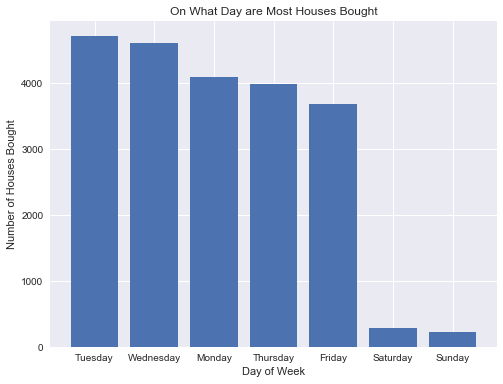

In [9]:
#set figure size
plt.figure(figsize = (8,6))
#plot bar graph
plt.bar(data.day.value_counts().index, data.day.value_counts().values)
#label
plt.title('On What Day are Most Houses Bought')
plt.xlabel('Day of Week')
plt.ylabel('Number of Houses Bought')
plt.show()

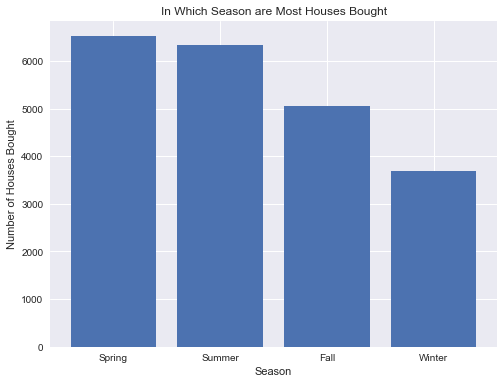

In [10]:
#set figure size
plt.figure(figsize = (8,6))
#plot bar graph
plt.bar(data.season.value_counts().index, data.season.value_counts().values)
#label
plt.title('In Which Season are Most Houses Bought')
plt.xlabel('Season')
plt.ylabel('Number of Houses Bought')
plt.show()

We find that Tuesday and Wednesday are the best days to sell your home as well as Spring and Summer being the best seasons. This can be due to the fact that most realtors and buyers are busy with a planned weekend, Thursday and Friday are when people are clocking out and Monday is a day people are focused back to work. Therefore, you're left with Tuesday and Wednesday. As for Spring and Summer, most families are getting ready to buy homes during downtime in the Summer when they have time to move right before their kids go to school.

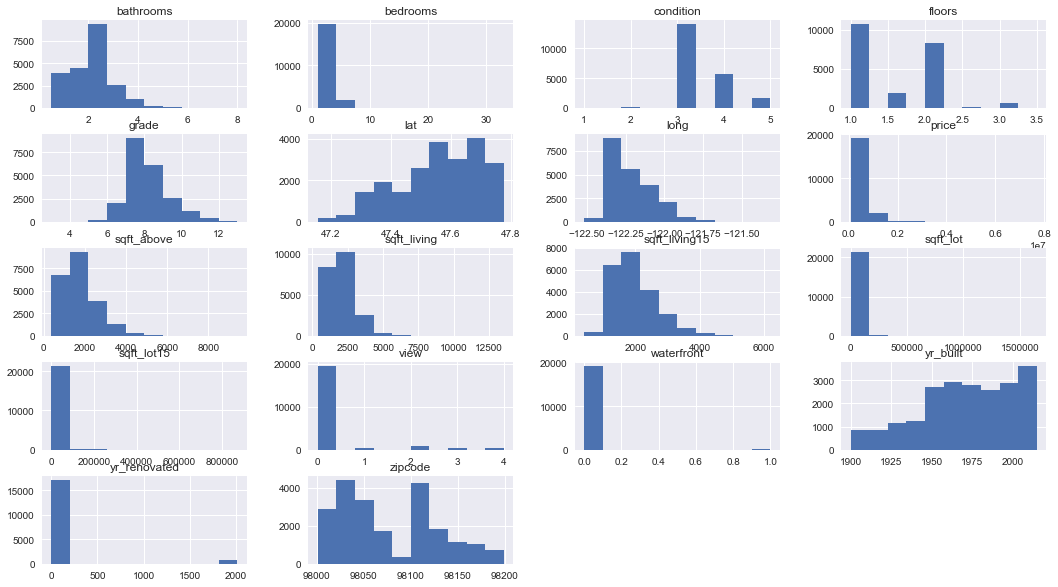

In [11]:
#plot histogram of our data to get a sense of what we're working with using .hist()
data.hist(figsize=(18,10));

Through the histograms, we can distinguish between our categorical and continous data as well as note that our continous variables do not have normality.

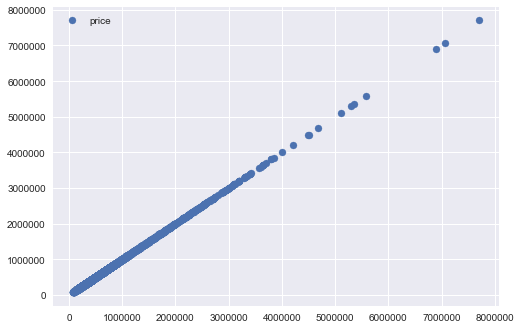

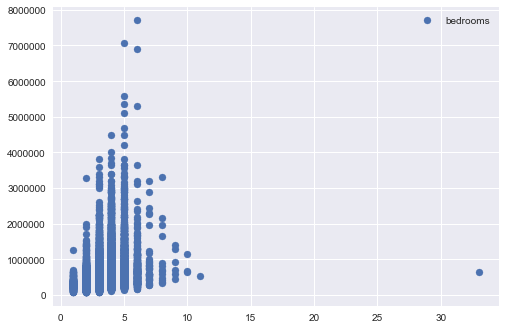

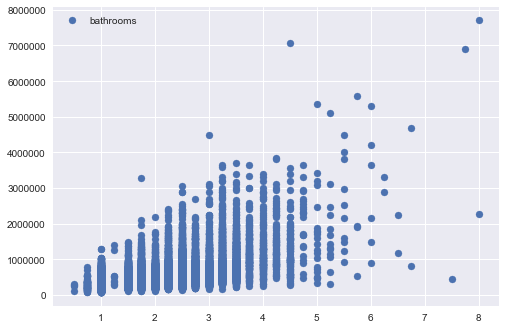

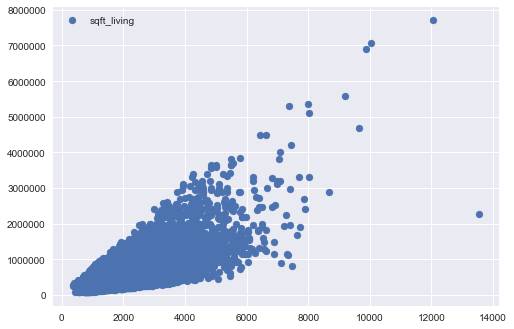

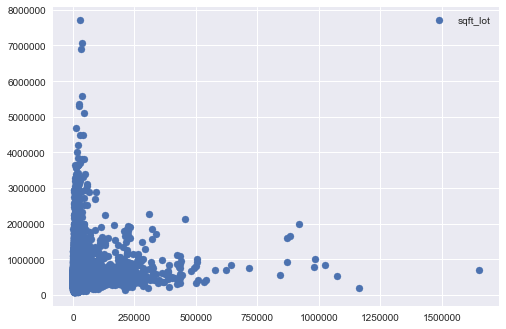

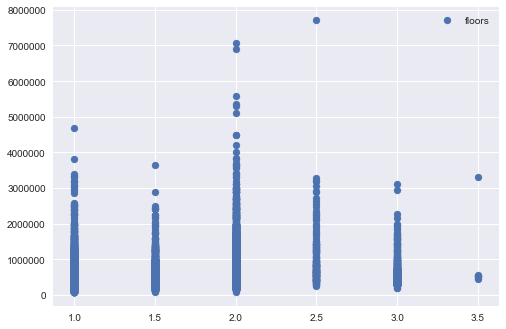

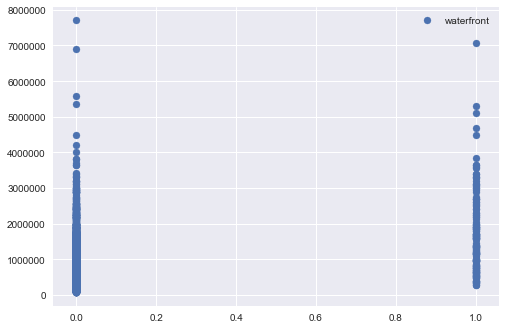

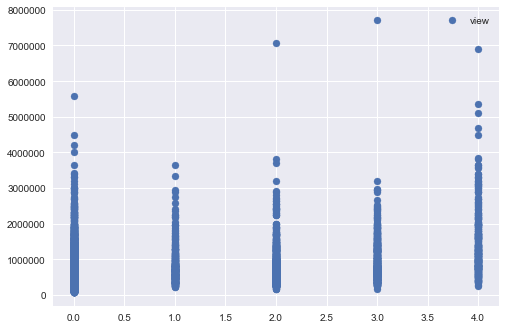

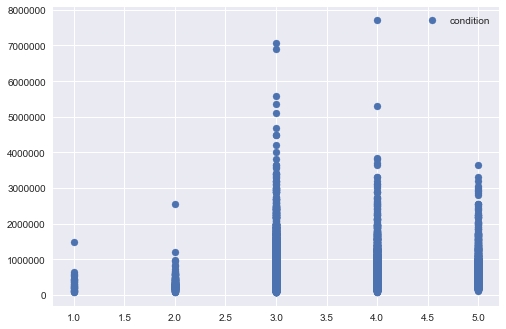

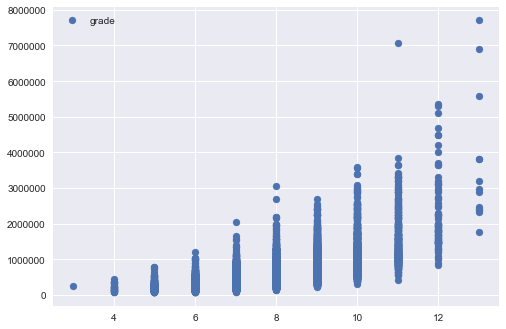

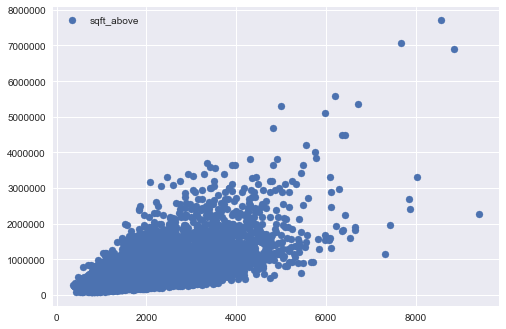

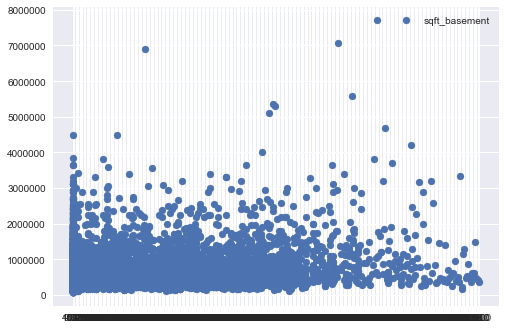

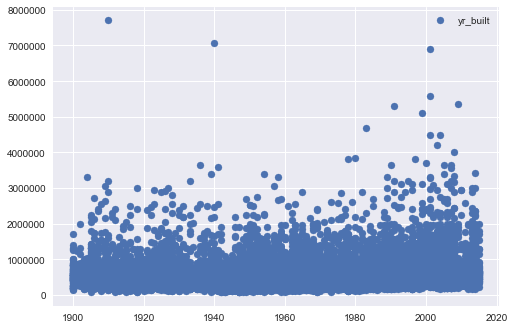

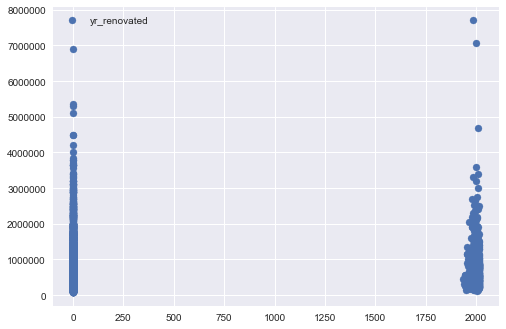

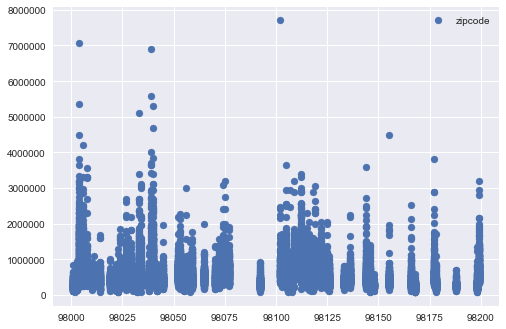

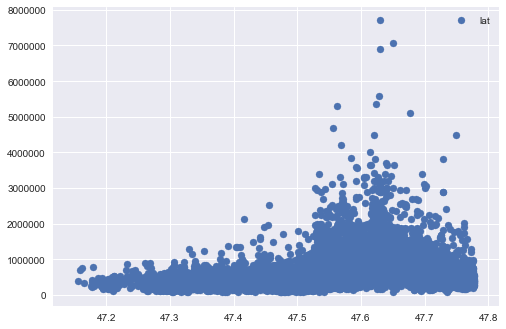

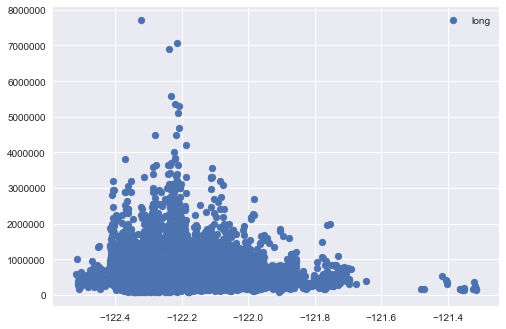

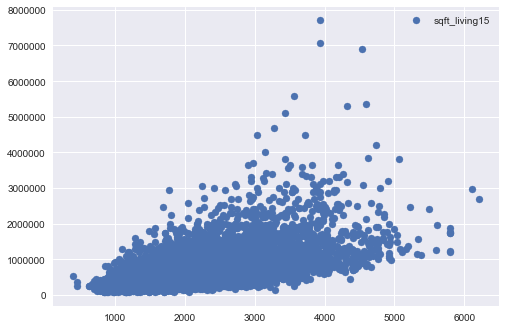

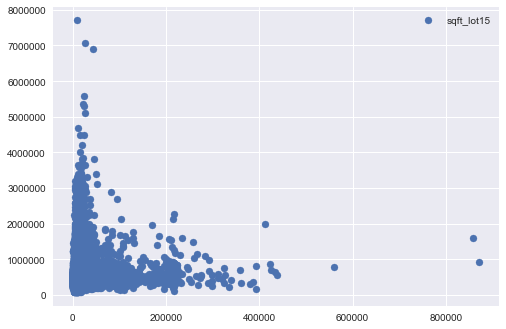

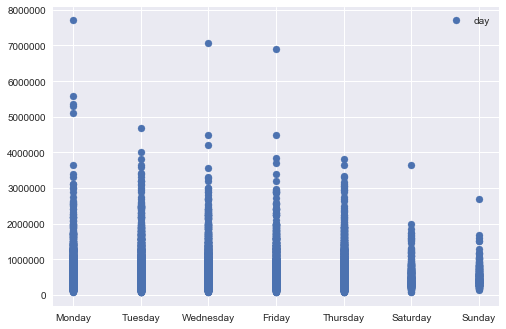

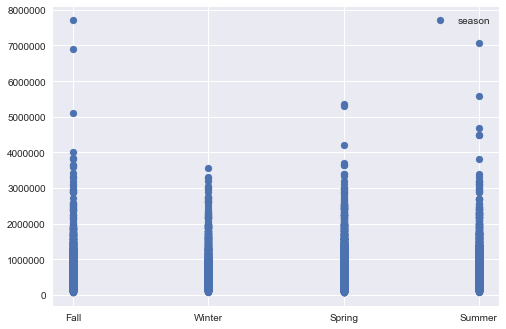

In [12]:
#plot scatter plot of each feature vs price to see linearity
#create new list
l_of_col = []
#for loop appending column names to list
for column in data.columns[1:]:
    l_of_col.append(column)
#for loop plotting scatter of feature vs price
for column in l_of_col:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

For the most part, most of our continous data experience some sort of linearity with the clear exception of sqft_lot, describing the square footage of the property. However, its hard to tell since there are so many data points and they are very close to each other. We can clearly see that bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, day and season are all categorical data. Now that we have visualized our data, we will move onto feature engineering stage of the project.

I first want to take care of the missing values in sqft_basement. From looking at our column descriptions, I believe to understand that sqft_living is the square footage of the entire house and sqft_above is the square footage of the house without the basement. Therefore, if sqft_living and sqft_above have values for all the missing data of sqft_basement, we will be able to subtract those two and get the proper square footage of all basements. Keep in mind, some differences will be zero as houses won't always have a basement.

In [13]:
#display top five values for sqft_basement column
display(data.sqft_basement.value_counts().head())
#display data for sqft_living and sqft_above but only for the rows in which sqft_basement is missing data
data.loc[data.sqft_basement == '?', ['sqft_living', 'sqft_above']]

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

,sqft_living,sqft_above
6,1715,1715
18,1200,1200
42,3595,3595
79,3450,3450
112,1540,1160
115,4380,2780
217,2250,2250
309,3320,2220
384,4800,3480
508,1540,820


In [14]:
#replace '?' values in sqft_basement with differnce of the other two columns
#we put absolute value to be certain our data doesn't produce an error
data.sqft_basement.replace('?', value = abs(data.sqft_living - data.sqft_above), inplace = True)
#we change data type of the column so the value counts sum up properly using .astype()
data.sqft_basement = data.sqft_basement.astype('float64')
#display first five values and their counts using value_counts()
data.sqft_basement.value_counts().head()

0.0      13110
600.0      221
700.0      218
500.0      214
800.0      206
Name: sqft_basement, dtype: int64

Now, let us deal with our null values. Below, we print out a summary of total null values in each feature and their value counts. We can notice that zero is the median and the largest value that appears in each feature by a large margin. Therefore, we will simply fill the null values with zero as it will not influence our data to a large degree.

In [15]:
print('view null values')
#display sum of null values in the feature using isnull().sum()
display(data.view.isnull().sum())
print('view value counts')
#display number of appearances of values in the feature using value_counts()
display(data.view.value_counts())
print('yr_renovated null values')
#display sum of null values in the feature using isnull().sum()
display(data.yr_renovated.isnull().sum())
print('yr_renovated value counts')
#display number of appearances of values in the feature using value_counts()
display(data.yr_renovated.value_counts())
print('waterfront null values')
#display sum of null values in the feature using isnull().sum()
display(data.waterfront.isnull().sum())
print('waterfront value counts')
#display number of appearances of values in the feature using value_counts()
display(data.waterfront.value_counts())

view null values


63

view value counts


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

yr_renovated null values


3842

yr_renovated value counts


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

waterfront null values


2376

waterfront value counts


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [16]:
#Fill NA/NaN values with 0 using .fillna()
data.view.fillna(0, inplace=True)
data.yr_renovated.fillna(0, inplace=True)
data.waterfront.fillna(0, inplace=True)

Since yr_renovated has numerous unique values, I will change the feature to a boolean expression representing True is the house was renovated and False if it wasn't. Similarly, since waterfront represents whether the house is on the water and the only two values are zero and one, I will change this to a boolean data type. Lastly, there are 13110 houses without a basement and so, I will also change this to a boolean data type. The view feature, on the other hand, has different possible values but has zero holding the majority of its value count. Therefore, I will drop view from my data set.

In [17]:
#use astype.(bool) to change to bool type
data.yr_renovated = data.yr_renovated.astype(bool)
#.rename() to change name of column
data.rename(columns={'yr_renovated':'renovated'}, inplace=True)
#use astype.(bool) to change to bool type
data.waterfront = data.waterfront.astype(bool)
#use astype.(bool) to change to bool type
data.sqft_basement = data.sqft_basement.astype(bool)
#.rename() to change name of column
data.rename(columns={'sqft_basement':'basement'}, inplace=True)
data.drop('view', axis = 1, inplace = True)

In [18]:
data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
condition                 int64
grade                     int64
sqft_above                int64
basement                   bool
yr_built                  int64
renovated                  bool
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
day                      object
season                   object
dtype: object

We will now change our data types to float for all features from int64 to float64 except for zipcode and yr_built which will bin and engineer into dummy variables later.

In [19]:
col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']
for x in col:
    data[x] = data[x].astype('float64')

Below, we implement a seaborn heatmap while displaying only values greater than 0.75 and masking the top half of the matrix. This is because, we are not concerned with the other multicollinearity values less than the cutoff selected and the matrix represents the same values on the upper half as the lower half.

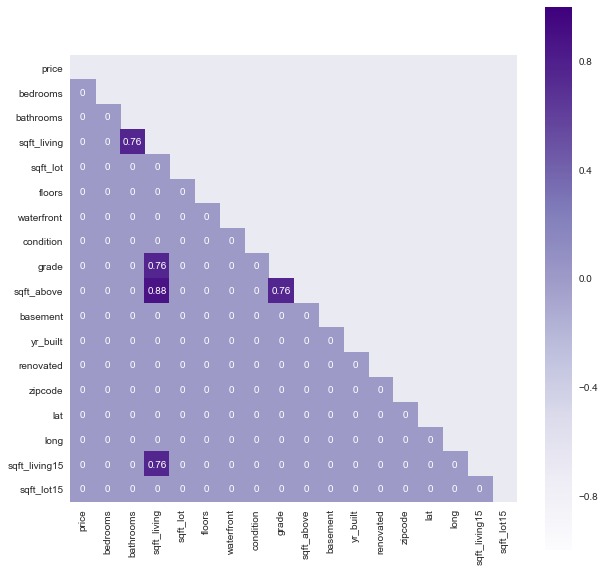

In [20]:
plt.figure(figsize=(10, 10))
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

We drop sqft_living as it is very positively correlated to many other features. We also don't have a reason to keep it in our data since the information supplied by this feature is covered by the combination of sqft_above and basement. We will keep grade as it will be one hot encoded later on in the notebook.

In [21]:
#.drop() sqft_living from data
data.drop('sqft_living', axis=1, inplace = True)

When dealing with yr_built and zipcode, I found that data bining the two would create small groups of the data, and giving our seller a better idea of how living in a certain zipcode and having a house from a certain era helps or hurts price. For years, I decided to group the houses based on changes in the economy for pre 90s houses and then group the houses by decades afterwards. Thus we split into Pre-World War 2 Era, Pre-80s Financial Recession, and afterwards split up into decades as most of the data resides during that period. For zipcodes, I simply split up into eight different groups spaced between 98001 and 98200.

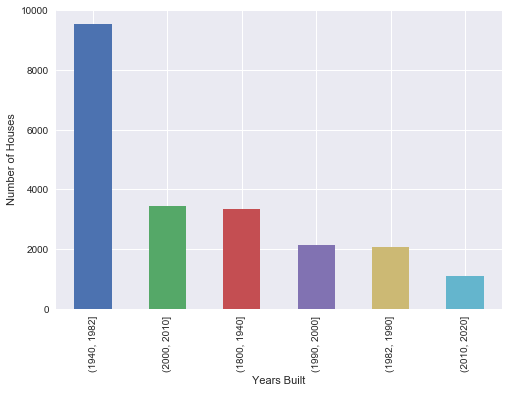

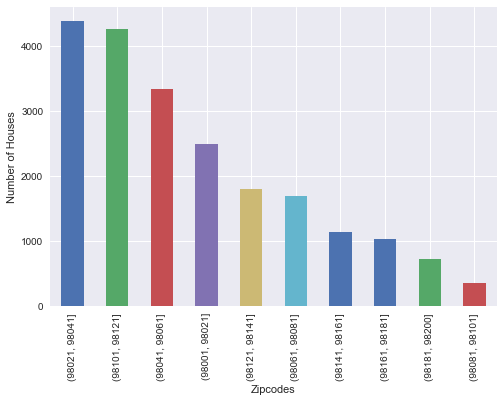

In [22]:
#create bins
years = [1800, 1940, 1982, 1990, 2000, 2010, 2020]
#use pd.cut to create variable to store bins
binnedyears = pd.cut(data.yr_built, years)
#transform unordered discrete intervals created from pd.cut into ordered bins
binnedyears = binnedyears.cat.as_unordered()
binnedyears.value_counts().plot(kind='bar')
plt.xlabel('Years Built')
plt.ylabel('Number of Houses')
plt.show()
#replace data
data.yr_built = binnedyears
#And now we rinse and repeat with zipcodes
#create bins
zips = [98001, 98021, 98041, 98061, 98081 ,98101, 98121, 98141, 98161, 98181, 98200]
#use pd.cut to create variable to store bins
binnedzips = pd.cut(data.zipcode, zips)
#transform unordered discrete intervals created from pd.cut into ordered bins
binnedzips = binnedzips.cat.as_unordered()
binnedzips.value_counts().plot(kind='bar')
plt.xlabel('Zipcodes')
plt.ylabel('Number of Houses')
plt.show()
#replace data
data.zipcode= binnedzips
#convert categorical columns to its numerical codes
data.yr_built = data.yr_built.cat.codes
data.zipcode = data.zipcode.cat.codes
#create dummy variable categories and drop the first to eliminate dummy variable trap using pd.get_dummies
zips_dummy = pd.get_dummies(binnedzips, prefix="zip", drop_first=True)
years_dummy = pd.get_dummies(binnedyears, prefix="yr", drop_first=True)
#drop variables
data = data.drop(["yr_built","zipcode"], axis=1)
data = pd.concat([data, zips_dummy, years_dummy], axis=1)

Before continuing to create dummy variables for our other categorical features, I will plot price in 3 different categories on a long-lat graph in the hopes of answering whether different neighborhoods in King County are comprised of a different demogrpahic based on wealth. We have below an lmplot using seaborn, where our x and y axes are longitude and latitude, respectively, and we split our pricing data into three parts.

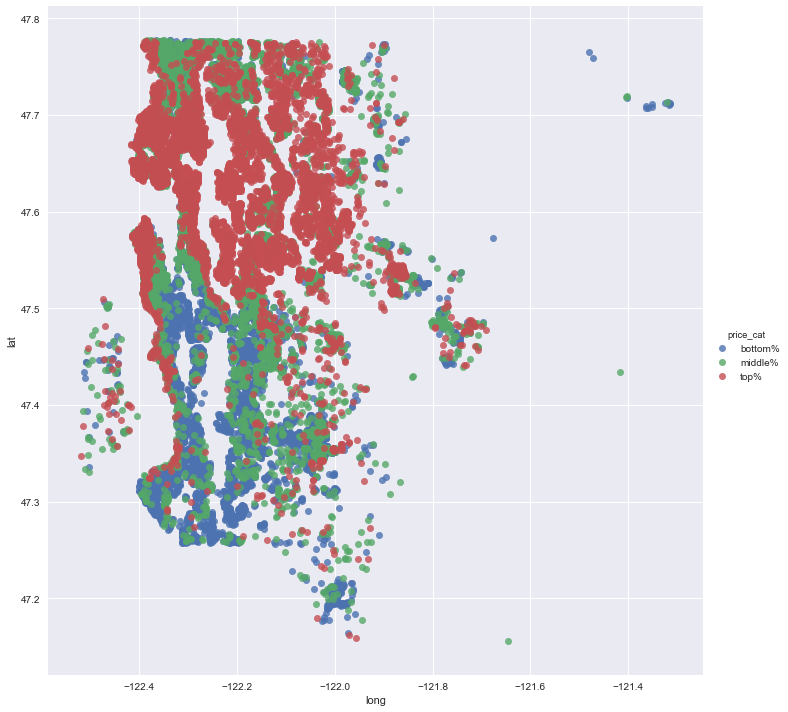

In [23]:
price_cat = pd.qcut(data.price, 3, labels=["bottom%", "middle%", "top%"])
data['price_cat'] = price_cat
lmplot(data=data, x="long", y="lat", fit_reg=False, hue='price_cat', height=10)
plt.show()
data.drop('price_cat', axis = 1, inplace = True)

To dive deeper into the importance of location in our dataset, I want to find out where houses with better grades are. The question I wanted to answer is if grade can be influenced by the location of the house.  To do so, we plot grade using lmplot once again on a long-lat plot. As we can see, most of our higher graded houses are located near each other, possibly near water or better view. However, as we note in our heatmap above, waterfront and grade are not correlated with each other to a high degree so other factors that we aren't accounting in our dataset probably describe why most of the high graded houses are located near each other. It seems as well that average graded houses are evenly spaced among King County.

To dig deeper, I will also try to find out where houses with better conditions are, where houses with waterfronts are located and where renovated houses reside. 

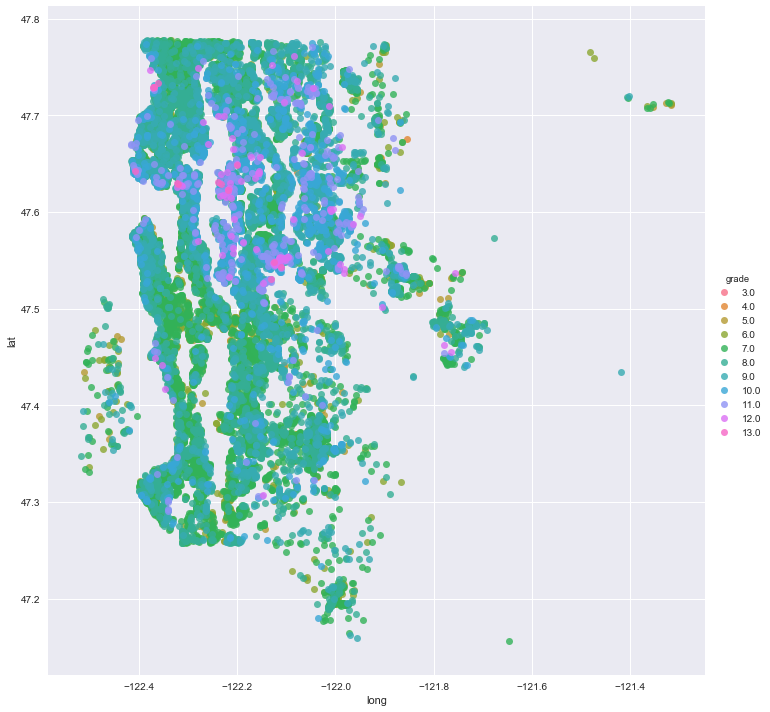

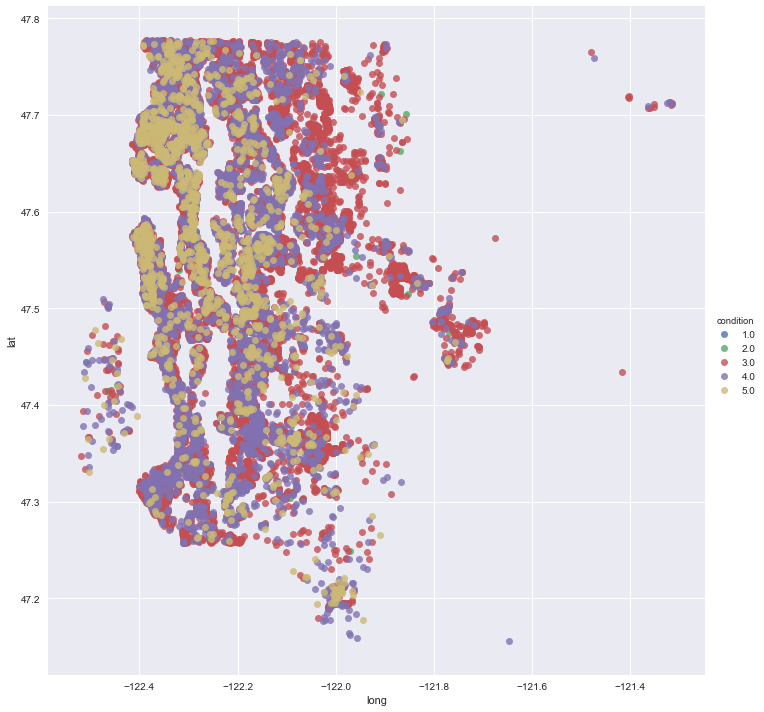

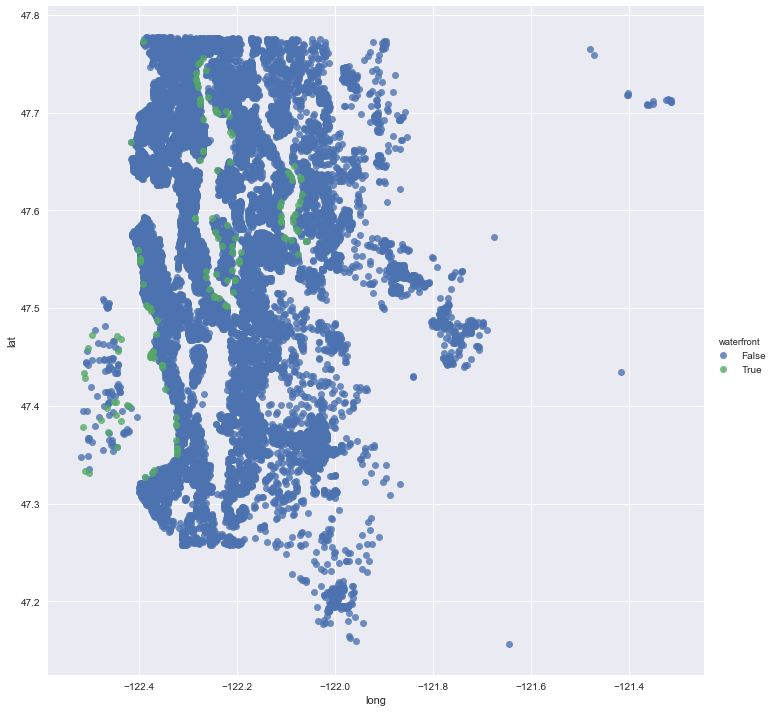

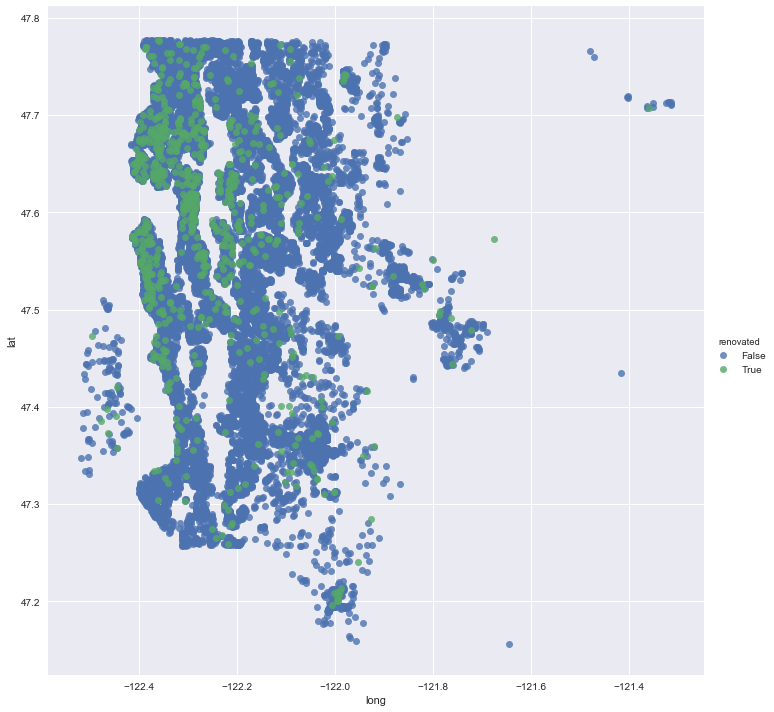

In [24]:
lmfeat = ['grade', 'condition', 'waterfront', 'renovated']
for x in lmfeat:
    lmplot(data=data, x="long", y="lat", fit_reg=False, hue=x, height=10)
    plt.show()

It is apparent that the top 33% percentage of wealth in King County reside in a seperate location from the bottom 33% percentage of wealth in King County, whereas once again, the middle are spaced out among the total area.

Now we may continue with engineering our features by one hot encoding our remaining categorical data and normalizing/scaling our continuous data. First, we are eliminating outliers from our bedrooms and bathrooms data. In our df.describe function used in the beginning of the notebook, the max values of both were incredibly high compared to the mean and our mean values of the were equal to the 25th percent quartile. Therefore, after running the notebook with different max cutoff values, I found it best to keep them with values from 25th percent quartile to a little over the 75th percent quartile. Afterwards we will seperate are continuous and categorical data.

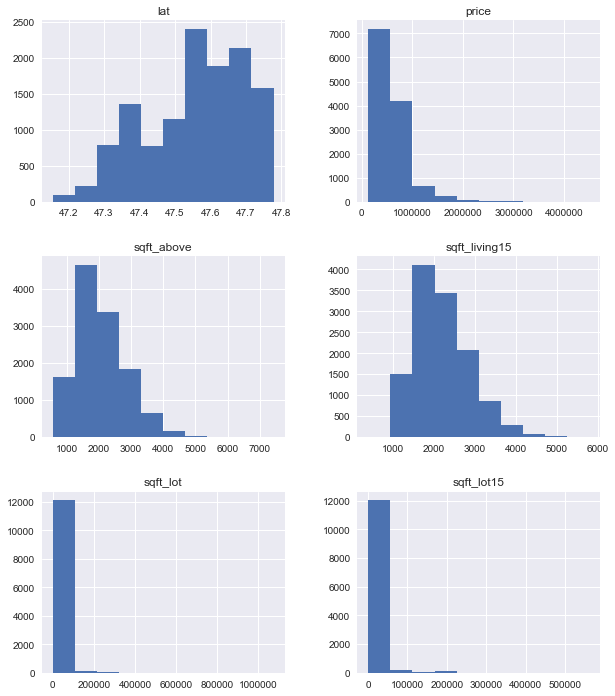

In [25]:
#we delete rows where values of bedrooms are between 2 and 5, inclusively
data= data[(data.bedrooms <= 5) & (data.bedrooms >=2)]
#we delete rows where values of bathrooms are between 2 and 3.5, inclusively
data= data[(data.bathrooms <= 3.5) & (data.bathrooms >=2)]

#reset index numbers and drop the old index column
data.reset_index(inplace = True)
data.drop('index', axis = 1, inplace = True)

#use pd.concat to make a new DataFrame
feat_cat = pd.concat([data.bedrooms, data.bathrooms, data.floors, data.condition, data.grade], axis=1)
#use pd.concat to make a new DataFrame
feat_cont = pd.concat([data.sqft_above, data.sqft_living15, data.sqft_lot,
                       data.sqft_lot15, data.lat, data.price], axis=1)
#plotting a histogram of the selected continous features before normalizing and scaling
feat_cont.hist(figsize=(10,12));

In [26]:
#create dummy variable categories and drop the first to eliminate dummy variable trap using pd.get_dummies
bed = pd.get_dummies(feat_cat.bedrooms, prefix='bedrooms', drop_first=True)
bath = pd.get_dummies(feat_cat.bathrooms, prefix='bathrooms', drop_first=True)
fl = pd.get_dummies(feat_cat.floors, prefix='floors', drop_first=True)
cond = pd.get_dummies(feat_cat.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(feat_cat.grade, prefix='grade', drop_first=True)

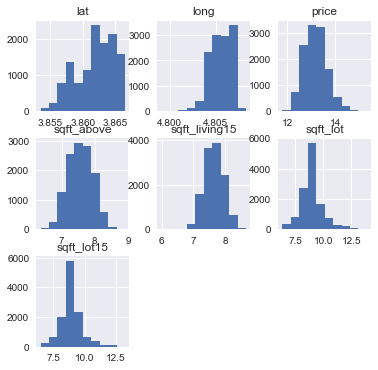

In [27]:
# Create a pandas Dataframe to store new normalized continous features using pd.DataFrame
logdf = pd.DataFrame([])

#for loop to log transform each column except for long since it has negative numbers
#we must take the absolute value of the column
for x in feat_cont.columns:
    logdf[x] = np.log(data[x])
logdf['long'] = np.log(abs(data.long))

#plot histogram of new normalized continous features to compare to original above
logdf.hist(figsize = [6, 6]);

#we scale to feature range between 0 and 1 using MinMaxScaler()
#fit the scalar onto our logdf DataFrame and convert back to a DataFrame as it had transformed into an array
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(logdf)
scaled_df = pd.DataFrame(scaled_df, columns=['sqft_above', 'sqft_living15',
                                             'sqft_lot', 'sqft_lot15', 'lat', 'price', 'long'])

In [28]:
for x in scaled_df.columns:
    data[x] = scaled_df[x]
data

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,"zip_(98101, 98121]","zip_(98121, 98141]","zip_(98141, 98161]","zip_(98161, 98181]","zip_(98181, 98200]","yr_(1940, 1982]","yr_(1982, 1990]","yr_(1990, 2000]","yr_(2000, 2010]","yr_(2010, 2020]"
0,2014-12-09,0.397103,3.0,2.25,0.336764,2.0,False,3.0,7.0,0.517655,...,0,1,0,0,0,1,0,0,0,0
1,2014-12-09,0.429984,4.0,3.00,0.287618,1.0,False,5.0,7.0,0.232852,...,0,1,0,0,0,1,0,0,0,0
2,2015-02-18,0.381916,3.0,2.00,0.351290,1.0,False,3.0,8.0,0.417246,...,0,0,0,0,0,0,1,0,0,0
3,2014-06-27,0.187730,3.0,2.25,0.328780,2.0,False,3.0,7.0,0.425335,...,0,0,0,0,0,0,0,1,0,0
4,2015-03-12,0.252128,3.0,2.50,0.323643,2.0,False,3.0,7.0,0.463455,...,0,0,0,0,0,0,0,0,1,0
5,2015-04-03,0.456253,3.0,2.50,0.376838,1.0,False,3.0,8.0,0.457178,...,0,0,0,0,0,1,0,0,0,0
6,2015-03-12,0.392846,5.0,2.00,0.283577,1.5,False,3.0,7.0,0.446487,...,1,0,0,0,0,0,0,0,0,0
7,2015-01-24,0.450840,4.0,3.00,0.287618,2.0,False,3.0,9.0,0.481706,...,0,1,0,0,0,1,0,0,0,0
8,2014-07-31,0.309308,3.0,2.00,0.424588,2.0,False,3.0,7.0,0.463455,...,0,0,0,0,0,0,0,1,0,0
9,2014-08-26,0.770206,3.0,2.75,0.578713,1.0,False,3.0,9.0,0.545566,...,0,0,0,0,0,1,0,0,0,0


In [29]:
#using stats.kstest to check if we can drop null-hypothesis of our variables not being normal
for feat in feat_cont.columns:
    print(feat + ": " + str(stats.kstest(data[feat], 'norm')))
print('long: ' + str(stats.kstest(data.long, 'norm')))

sqft_above: KstestResult(statistic=0.5582888064256261, pvalue=0.0)
sqft_living15: KstestResult(statistic=0.6391726639552585, pvalue=0.0)
sqft_lot: KstestResult(statistic=0.5190848972305282, pvalue=0.0)
sqft_lot15: KstestResult(statistic=0.5247564941540667, pvalue=0.0)
lat: KstestResult(statistic=0.5558400209515666, pvalue=0.0)
price: KstestResult(statistic=0.5422578505445189, pvalue=0.0)
long: KstestResult(statistic=0.6476870680571643, pvalue=0.0)


In [30]:
#concatenating new dummy categorical data and normalized + scaled continous
#data with our original dataset using pd.concat
data = pd.concat([data.drop('price', axis=1), bed, bath, fl, cond, grade, data.price], axis=1)
#display first five rows
data.head()

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,basement,...,condition_5.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,grade_10.0,grade_11.0,grade_12.0,grade_13.0,price
0,2014-12-09,3.0,2.25,0.336764,2.0,False,3.0,7.0,0.517655,True,...,0,0,1,0,0,0,0,0,0,0.397103
1,2014-12-09,4.0,3.00,0.287618,1.0,False,5.0,7.0,0.232852,True,...,1,0,1,0,0,0,0,0,0,0.429984
2,2015-02-18,3.0,2.00,0.351290,1.0,False,3.0,8.0,0.417246,False,...,0,0,0,1,0,0,0,0,0,0.381916
3,2014-06-27,3.0,2.25,0.328780,2.0,False,3.0,7.0,0.425335,False,...,0,0,1,0,0,0,0,0,0,0.187730
4,2015-03-12,3.0,2.50,0.323643,2.0,False,3.0,7.0,0.463455,False,...,0,0,1,0,0,0,0,0,0,0.252128


In [31]:
#we must drop original categorical data that had been one hot encoded
data = data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade'], axis=1)

Let us look at our new features.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 53 columns):
date                  12397 non-null datetime64[ns]
sqft_lot              12397 non-null float64
waterfront            12397 non-null bool
sqft_above            12397 non-null float64
basement              12397 non-null bool
renovated             12397 non-null bool
lat                   12397 non-null float64
long                  12397 non-null float64
sqft_living15         12397 non-null float64
sqft_lot15            12397 non-null float64
day                   12397 non-null object
season                12397 non-null object
zip_(98021, 98041]    12397 non-null uint8
zip_(98041, 98061]    12397 non-null uint8
zip_(98061, 98081]    12397 non-null uint8
zip_(98081, 98101]    12397 non-null uint8
zip_(98101, 98121]    12397 non-null uint8
zip_(98121, 98141]    12397 non-null uint8
zip_(98141, 98161]    12397 non-null uint8
zip_(98161, 98181]    12397 non-null uint8
zip_(98181,

Below, we implement a seaborn heatmap while displaying only values greater than 0.75 and masking the top half of the matrix. This is because, we are not concerned with the other multicollinearity values less than the cutoff selected and the matrix represents the same values on the upper half as the lower half.

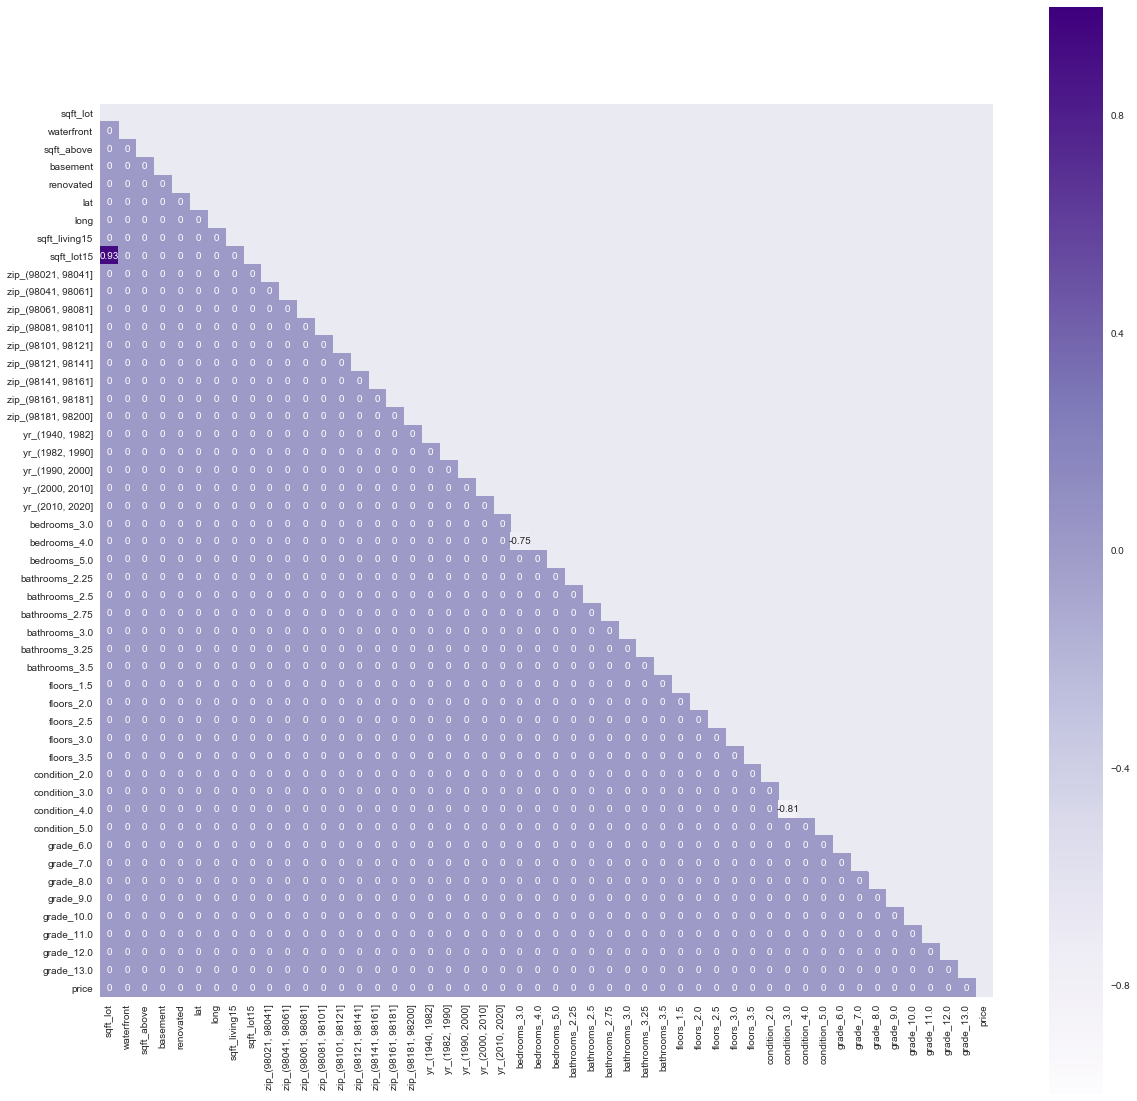

In [33]:
plt.figure(figsize=(20, 20))
#do not display correlation values less than or equal to 0.75
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
#mask upper half of matrix
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

We find bedrooms_3.0 and bedrooms_4.0 are highly correlated, and condition_3.0 and condition_4.0 are highly correlated. Therefore, I decide to drop condition_3.0 and bedrooms_3.0. We also drop sqft_lot15 as, to me, it is redundant with sqft_living15.

Here, we are using a forward-backward selection algorithm given from learn.co found on data science stack exchange:
https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm

In [34]:
#use .drop() to remove unwanted features
data.drop(['sqft_lot15', 'condition_3.0', 'bedrooms_3.0'], axis = 1, inplace = True)

#use .drop to remove features not needed in model
X = data.drop(['price', 'date', 'day', 'season'], axis=1)
#set y equal to our dependent variable
y = data.price
#using train_test_split(), we split our data in order to derive model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#add constant to train data
X_train = sm.add_constant(X_train)

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#run algorithm over train set to find best selectors
resultingfeatures = stepwise_selection(X_train.astype(float), y_train)

#we print our results to find the features to include in our model
print('resulting features:')
print(resultingfeatures)

Add  lat                            with p-value 0.0
Add  const                          with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  basement                       with p-value 0.0
Add  zip_(98101, 98121]             with p-value 3.59343e-97
Add  sqft_living15                  with p-value 1.32166e-153
Add  waterfront                     with p-value 3.13193e-101
Add  grade_7.0                      with p-value 1.84042e-64
Add  grade_8.0                      with p-value 2.72256e-89
Add  condition_5.0                  with p-value 1.79991e-54
Add  grade_6.0                      with p-value 2.13564e-63
Add  condition_4.0                  with p-value 1.237e-67
Add  renovated                      with p-value 1.17804e-60
Add  grade_9.0                      with p-value 1.81128e-62
Drop const                          with p-value 0.203552
Add  grade_10.0                     with p-value 3.14537e-20
Add  zip_(98041, 98061]             with p-value 1.9264e-17

Now we have our features selected with p-values at a 5% significant level. We will fit our model and predict both our dependent variables from our train data set and our test data set in order to compare difference in mean squared error. There are ways of concatenating our selected features to the DataFrame for our model through loops iterating through each selected column and also simply writing them out. However, I created a seperate DataFrame (named Z) that takes the X-train set and drops the selected features. Then we make our actual data set for the model by taking the X-train set and dropping all our columns in the Z set. Therefore, we are left with just the selected features from our algorithm above.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     834.3
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:22:11   Log-Likelihood:                 10944.
No. Observations:                8305   AIC:                        -2.182e+04
Df Residuals:                    8270   BIC:                        -2.157e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0646      0.011     -5.856      0.000      -0.086      -0.043
sqft_lot               0.0405      0.008      4.940      0.000       0.024       0.057
waterfront             0.1762      0.009     20.112      0.000       0.159       0.193
sqft_above             0.2923      0.010     28.313      0.000       0.272       0.313
basement               0.0420      0.002     20.341      0.000       0.038       0.046
renovated              0.0572      0.004     13.508      0.000       0.049       0.066
lat                    0.2259      0.004     61.218      0.000       0.219       0.233
long                  -0.0513      0.008     -6.052      0.000      -0.068      -0.035
sqft_living15          0.1893      0.010     18.170      0.000       0.169       0.210
zip_(98021, 98041]    -0.0082      0.002     -3.606      0.000      -0.013      -0.004
zip_(98041, 98061]    -0.0293      0.002    -11.772      0.000      -0.034      -0.024
zip_(98061, 98081]    -0.0319      0.003    -10.433      0.000      -0.038      -0.026
zip_(98081, 98101]    -0.0322      0.006     -5.858      0.000      -0.043      -0.021
zip_(98101, 98121]     0.0441      0.003     15.964      0.000       0.039       0.049
zip_(98141, 98161]    -0.0189      0.004     -4.667      0.000      -0.027      -0.011
zip_(98161, 98181]    -0.0290      0.004     -6.555      0.000      -0.038      -0.020
zip_(98181, 98200]     0.0182      0.005      3.863      0.000       0.009       0.027
yr_(1940, 1982]       -0.0414      0.003    -13.379      0.000      -0.047      -0.035
yr_(1982, 1990]       -0.0541      0.004    -14.310      0.000      -0.061      -0.047
yr_(1990, 2000]       -0.0483      0.004    -12.543      0.000      -0.056      -0.041
yr_(2000, 2010]       -0.0424      0.004    -11.390      0.000      -0.050      -0.035
yr_(2010, 2020]       -0.0283      0.004     -6.529      0.000      -0.037      -0.020
bedrooms_4.0          -0.0044      0.002     -2.838      0.005      -0.007      -0.001
bathrooms_3.25         0.0166      0.004      4.675      0.000       0.010       0.024
bathrooms_3.5          0.0199      0.003      5.866      0.000       0.013       0.027
floors_2.0            -0.0084      0.002     -4.271      0.000      -0.012      -0.005
condition_4.0          0.0318      0.002     15.045      0.000       0.028       0.036
condition_5.0          0.0548      0.003     17.167      0.000       0.049       0.061
grade_7.0              0.0491      0.005      8.990      0.000       0.038       0.060
grade_8.0              0.0905      0.006     16.129      0.000       0.080       0.102
grade_9.0              0.1399      0.006     23.187      0.000       0.128       0.152
grade_10.0             0.1793      0.007     27.008      0.000       0.166       0.192
grade_11.0             0.2284      0.0

Train Mean Squared Error: 0.0041964543316652
Test Mean Squared Error: 0.004274298605651852
difference: 0.0
R-Squared of Train Set:  0.7742583652994673
R-Squared of Test Set:  0.7581925325059278
Mean Absolute Error of Test Set:  0.05001602072583488
Root Mean Squared Error of Test Set:  0.06537812023645106


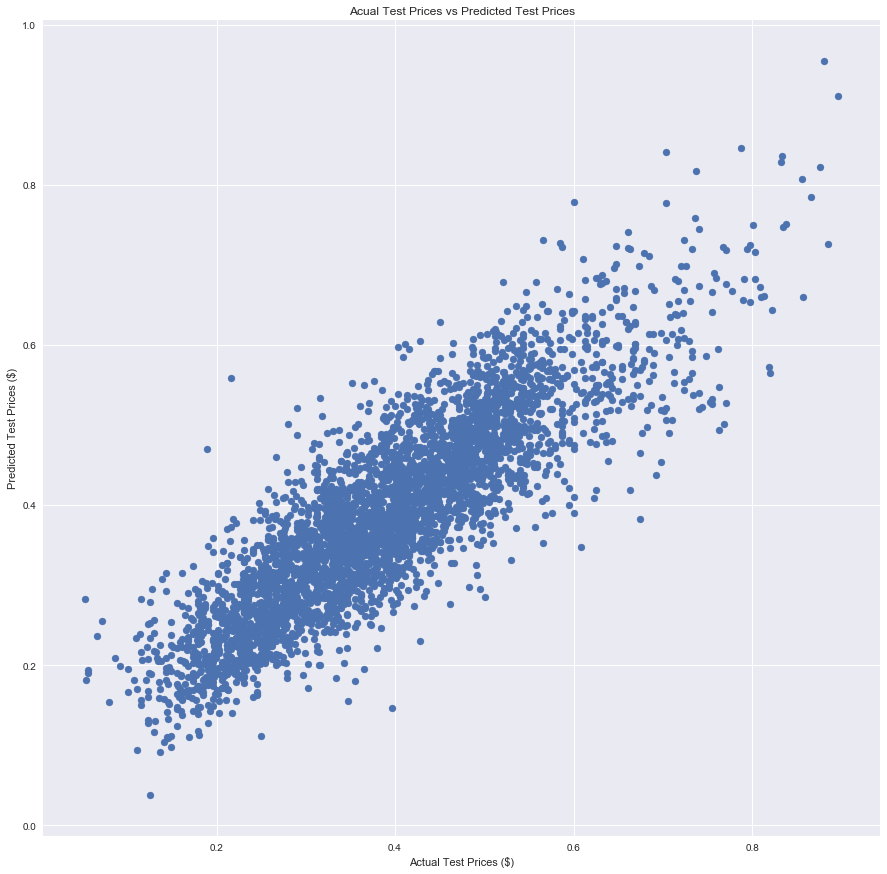

In [35]:
#.drop() selected features from X_train and name a new DataFrame
Z = X_train.drop(resultingfeatures, axis=1)
#.drop() columns that are in our newly created DataFrame from X_train and name a new DataFrame
X1 = X_train.drop(Z.columns, axis=1)
#y1 is assigned our y_train values
y1 = y_train
#We do the same as we did for X-test set as we did for the X-train set
X2 = X_test.drop(Z.columns, axis=1)
#add constant as we never added a constant for X_test set
X2 = sm.add_constant(X2)

#run OLS model using train data
model = sm.OLS(y1, X1.astype(float))
#fit the model
results = model.fit()
#display summary of resluts using .summary()
display(results.summary())

#predict our price values using .predict()
y_hat_train = results.predict(X1)
y_hat_test = results.predict(X2)

#plot scatter plot of actual y_test values and predicted y_test values
plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_hat_test)
plt.title('Acual Test Prices vs Predicted Test Prices')
plt.xlabel('Actual Test Prices ($)')
plt.ylabel('Predicted Test Prices ($)')

#print out our statistics summary of predicted values using sklearn metrics
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('difference: ' + str(np.round(abs(np.sqrt(train_mse)-np.sqrt(test_mse)),2)))
r2train = r2_score(y_train, y_hat_train)
r2test = r2_score(y_test, y_hat_test)
print('R-Squared of Train Set: ', r2train)
print('R-Squared of Test Set: ', r2test)
mae = mean_absolute_error(y_test, y_hat_test)
rms = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Mean Absolute Error of Test Set: ', mae)
print('Root Mean Squared Error of Test Set: ', rms)

Now that we have our prices predicted, we will invert the results back to the right range. To do so, we create a DataFrame and concatenate our y_test and y_train values and sort the results. Then using our MinMaxscaled DataFrame, we invert the values and transform back into a DataFrame. Finally, we reverse the log normalization performed earlier to give us the standardized price values. We do this once agian for our predicted prices.

In [36]:
#create DataFrame
newinvert = pd.DataFrame([])
#concatenate prices using pd.concat
newinvert['price'] = pd.concat([y_test, y_train])
#sort in ascending order using sort.index()
newinvert.sort_index()
#invert_transform our values
invert = scaled_df.copy()
invert.price = newinvert.price
invert = scaler.inverse_transform(invert)
invert = pd.DataFrame(invert, columns=['sqft_above', 'sqft_living15',
                                             'sqft_lot', 'sqft_lot15', 'lat', 'price', 'long'])
#perform e^price values
ady = np.exp(invert)

In [37]:
#create DataFrame
newinvert1 = pd.DataFrame([])
#concatenate prices using pd.concat
newinvert1['price'] = pd.concat([y_hat_test, y_hat_train])
#sort in ascending order using sort.index()
newinvert1.sort_index()
invert1 = scaled_df.copy()
#invert_transform our values
invert1.price = newinvert1.price
invert1 = scaler.inverse_transform(invert1)
invert1 = pd.DataFrame(invert1, columns=['sqft_above', 'sqft_living15',
                                             'sqft_lot', 'sqft_lot15', 'lat', 'price', 'long'])
#perform e^price values
ady1 = np.exp(invert1)

Now we split our test data into two seperate lists of prices for the given prices and the predicted prices.

In [38]:
#create two empty lists
y_test_actual = []
y_hat_test_actual = []
#for loop appending the prices to the approriate list
for x in list(y_test.index):
    y_test_actual.append(ady.price[x])
    y_hat_test_actual.append(ady1.price[x])

In [39]:
#round off the values using np.round()
y_test_actual = np.round(y_test_actual)
y_hat_test_actual = np.round(y_hat_test_actual)

In [40]:
#print the values
print(y_test_actual)
print(y_hat_test_actual)

[624800. 600000. 299000. ... 840000. 318700. 543000.]
[604669. 645609. 293450. ... 737941. 455462. 623993.]


In [41]:
#print the avergae prices using mean()
print('Average Actual Price: ' + str(y_test_actual.mean()))
print('Average Predicted Price: ' + str(y_hat_test_actual.mean()))

Average Actual Price: 591275.7228739003
Average Predicted Price: 575981.158113392


In [42]:
#print the difference of actual and predicted prices
print('Difference of Average Actual and Predicted Prices: ' + str(y_test_actual.mean() - y_hat_test_actual.mean()))

Difference of Average Actual and Predicted Prices: 15294.564760508365


Now, using sklearn and LinearRegression(), we can select 5 best features to estimate housing prices out of the ones we used for our model.

In [43]:
linreg = LinearRegression()
#Feature ranking with recursive feature elimination
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X1, y1)
#.support tells you which ones were selected
print(X1.columns)
print(selector.support_)

Index(['const', 'sqft_lot', 'waterfront', 'sqft_above', 'basement',
       'renovated', 'lat', 'long', 'sqft_living15', 'zip_(98021, 98041]',
       'zip_(98041, 98061]', 'zip_(98061, 98081]', 'zip_(98081, 98101]',
       'zip_(98101, 98121]', 'zip_(98141, 98161]', 'zip_(98161, 98181]',
       'zip_(98181, 98200]', 'yr_(1940, 1982]', 'yr_(1982, 1990]',
       'yr_(1990, 2000]', 'yr_(2000, 2010]', 'yr_(2010, 2020]', 'bedrooms_4.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'floors_2.0', 'condition_4.0',
       'condition_5.0', 'grade_7.0', 'grade_8.0', 'grade_9.0', 'grade_10.0',
       'grade_11.0', 'grade_12.0', 'grade_13.0'],
      dtype='object')
[False False  True  True False False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True]
